<a href="https://colab.research.google.com/github/SamuelGalaxys/BluehousePolitics/blob/main/%EC%B2%AD%EC%99%80%EB%8C%80%EA%B5%AD%EB%AF%BC%EC%B2%AD%EC%9B%90%EC%A0%95%EC%B1%85%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#### 국민 청원에서 이슈가 된 게시물과 소셜 온라인상에서 이슈가 된 게시물 사이엔 어떤 관계가 있을까??
* 밑의 데이터프레임은 이전의 청원데이터에서 뽑아낸 자료
* y 값(청원동의수,청원 건수)
* x 값(감정표현 수, 댓글수, 기사수)

#### 인천대학교 산학 협력 데이터

In [ ]:
raw_data = {'label':[
'공매도 금지','국민연금제도 폐지','김의겸 투기','백화점 단축근무','육아 단축근무','동물 보호법','어립이집 cctv','국민청원 폐지','박근혜 석방','윤석열 처벌','어린이집 교사 처우 개선','국가 유공자 처우 개선','문재인 탄핵','화성연쇄살인','아동학대','불법 업체고발','의료사고 피해자','공수처','성범죄 처벌','언론사 세무조사'
],
            '청원동의수':[72773,281,1749,54174,2278,573259,11194,383,4407,1268545,87428,1230,2152438,31698,354862,159,25379,180137,752871,231838],
            '청원 건수':[23,6,37,3,5,9,4,1,3,22,15,3,15,3,27,1,14,25,27,3],
            '감정표현 수':[49099,16,32087,16,115,655,10,3251,79919,23219,26,57,85020,120273,59984,8,7,837742,14956,494],
            '댓글수':[35840,2,18726,9,146,287,4,2209,61946,13348,52,13,37761,101857,35349,3,19,422651,7085,79],
            '기사수':[392,1,281,1,8,9,2,27,485,106,2,17,441,2578,2540,12,1,7037,325,12]}

In [ ]:
df = pd.DataFrame(raw_data)

In [ ]:
df

,label,청원동의수,청원 건수,감정표현 수,댓글수,기사수
0,공매도 금지,72773,23,49099,35840,392
1,국민연금제도 폐지,281,6,16,2,1
2,김의겸 투기,1749,37,32087,18726,281
3,백화점 단축근무,54174,3,16,9,1
4,육아 단축근무,2278,5,115,146,8
5,동물 보호법,573259,9,655,287,9
6,어립이집 cctv,11194,4,10,4,2
7,국민청원 폐지,383,1,3251,2209,27
8,박근혜 석방,4407,3,79919,61946,485
9,윤석열 처벌,1268545,22,23219,13348,106


In [ ]:
df['log_청원동의수'] = df['청원동의수'].apply(lambda x: np.log(x))
df['log_청원 건수'] = df['청원 건수'].apply(lambda x: np.log(x))
df['log_감정표현 수'] = df['감정표현 수'].apply(lambda x: np.log(x))
df['log_댓글수'] = df['댓글수'].apply(lambda x: np.log(x))
df['log_기사수'] = df['기사수'].apply(lambda x: np.log(x))

#### y = w1 * 청원동의수 + w2 * 청원건수
#### x = w1 * 감정 표현수 + w2 * 댓글수 + w3 * 기사수

#### 가상의 가중치 값
* 청원동의수에 대한 가중치:
 * 0.1222

* 감정표현 수에 대한 가중치:
 * 0.2976

* 댓글수에 대한 가중치:
 * 0.0570

* 기사수에 대한 가중치:
 * 0.5232


In [ ]:
#### 임의의 가중치
w_x_1 = 0.3
w_x_2 = 0.05
w_x_3 = 0.5
w_y_1 = 0.12
w_y_2 = 0.5

In [ ]:
# 지나치게 편차가 큰 값들로 인해 log화 진행
df['log_x']=w_x_1*df['log_감정표현 수']+w_x_2*df['log_댓글수']+w_x_3*df['log_기사수']
df['log_y']=w_y_1*df['log_청원동의수']+w_y_2*df['log_청원 건수']

#### 그래프상에서 한글을 나타내기 위해 korean_mat 설치


In [ ]:
# 그래프상에서 한글을 나타내기 위해 korean_mat 설치
! pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.3 MB/s eta 0:00:00


#### 회귀선과 산점도 그리기

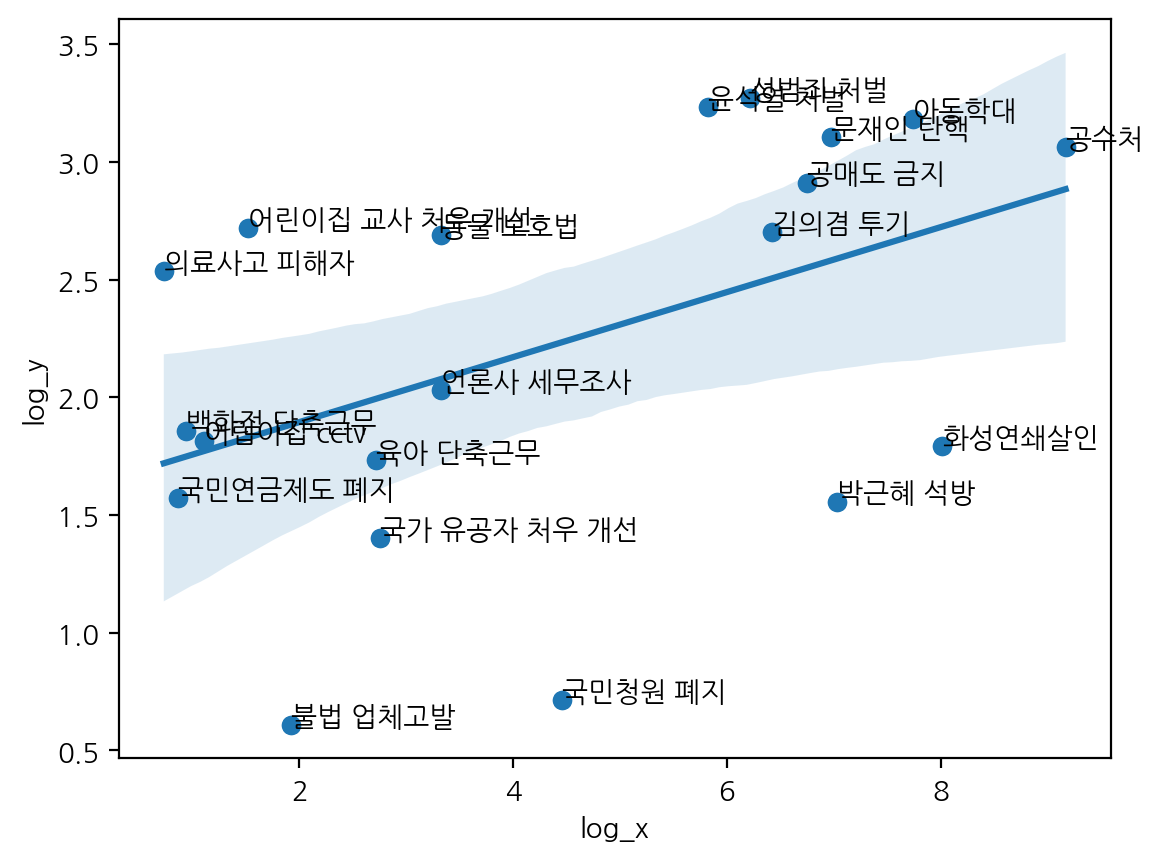

In [ ]:
plt.scatter(x=df['log_x'],y=df['log_y'])

for i in range(df.shape[0]):
    row = df.iloc[i]
    name = row['label']
    x = row['log_x']
    y = row['log_y']
    plt.text(x,y,name)
sns.regplot(data=df,x=df['log_x'],y=df['log_y'])
plt.show()

#### 다음의 그래프를 아래와 같이 해석할 수 있을 것 같다.
*  회귀선에 해당하는 점들은 청원과 사람들의 관심도가 어느정도 비례하는 사건들이다
*  회귀선 아래에 있는 점들은 청원율은 높지만, 사람들의 관심도는 적은 사건들 -> 특정 집단의 염원이 강하게 들어간 사건들
*. 회귀선보다 위에 있는 점들은 청원율은 낮지만, 사람들의 관심도는 상대적으로 높았던 사건

#### 프로젝트를 통해 알아낼 수 있는것
* 그렇다면 정권별로 위의 그래프는 어떻게 변하게 될까?
* 뉴스의 성향별로 관심도는 어떻게 변하게 될까?
* 정권별로 사람들의 토픽별 관심도는 어떻게 달라졌을까
* 등등

#### 2017년 국민 청원 데이터 불러오기

#### txt 파일(json 형식으로 쓰여있음) -> 한 줄 씩 띄우고, 이를 json 파일로 로드 후 데이터 프레임으로 변환

In [ ]:
import pandas as pd
import json

file_path_1 = '/content/drive/MyDrive/download/petitions_2017-08.txt'  # 2017년 8월 청원
file_path_2 = '/content/drive/MyDrive/download/petitions_2017-09.txt'  # 2017년 9월 청원
file_path_3 = '/content/drive/MyDrive/download/petitions_2017-10.txt'  # 2017년 10월 청원
file_path_4 = '/content/drive/MyDrive/download/petitions_2017-11.txt'  # 2017년 11월 청원
file_path_5 = '/content/drive/MyDrive/download/petitions_2017-12.txt'  # 2017년 12월 청원

df_08 = pd.DataFrame()
df_09 = pd.DataFrame()
df_10 = pd.DataFrame()
df_11 = pd.DataFrame()
df_12 = pd.DataFrame()


file_list = [file_path_1,file_path_2,file_path_3,file_path_4,file_path_5]
df_list = [df_08,df_09,df_10,df_11,df_12]



index = 0
# 파일을 불러오고, 줄마다 띄어준다
for file in file_list:
    with open(file, 'r', encoding='utf-8', errors='ignore') as f:
         content = f.read()

    content = content.strip().split('\n')

    data_list = []
    for line in content:
        try:
            # 각 줄을 JSON 객체로 변환하고 리스트에 추가
            parsed_data = json.loads(line)
            data_list.append(parsed_data)
        except json.JSONDecodeError:
            # 오류가 발생한 경우, 해당 줄을 무시
            continue
    df_list[index] = pd.DataFrame(data_list)
    index += 1
    data_list = []


df_08,df_09,df_10,df_11,df_12 = df_list   # 데이터 로드가 끝난 데이터를 언패킹


In [ ]:
all_df_2017 = pd.concat([df_08,df_09,df_10,df_11,df_12])

In [ ]:
all_df_2017 # 2017년 8월부터 12월 후반까지의 청원 데이터
all_df_2017.to_csv('all_df_2017',index=False)

In [ ]:
all_df_2017[all_df_2017['num_agree'] >= 200000] # 20만건의 동의가 끝난 데이터셋

,category,begin,end,content,num_agree,petition_idx,status,title
840,안전/환경,2017-11-04,2017-12-04,,216774,26024,브리핑,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.
1231,성장동력,2017-12-03,2018-01-02,,255554,57132,브리핑,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.)
1076,인권/성평등,2018-01-03,2018-02-02,,233842,79162,브리핑,미성년자 성폭행 형량 올려주세요 종신형원합니다
2514,인권/성평등,2018-01-06,2018-02-05,,213219,81026,브리핑,초.중.고 학교 페미니즘교육 의무화


#### 데이터 탐색 및 시각화

<Axes: ylabel='num_agree'>

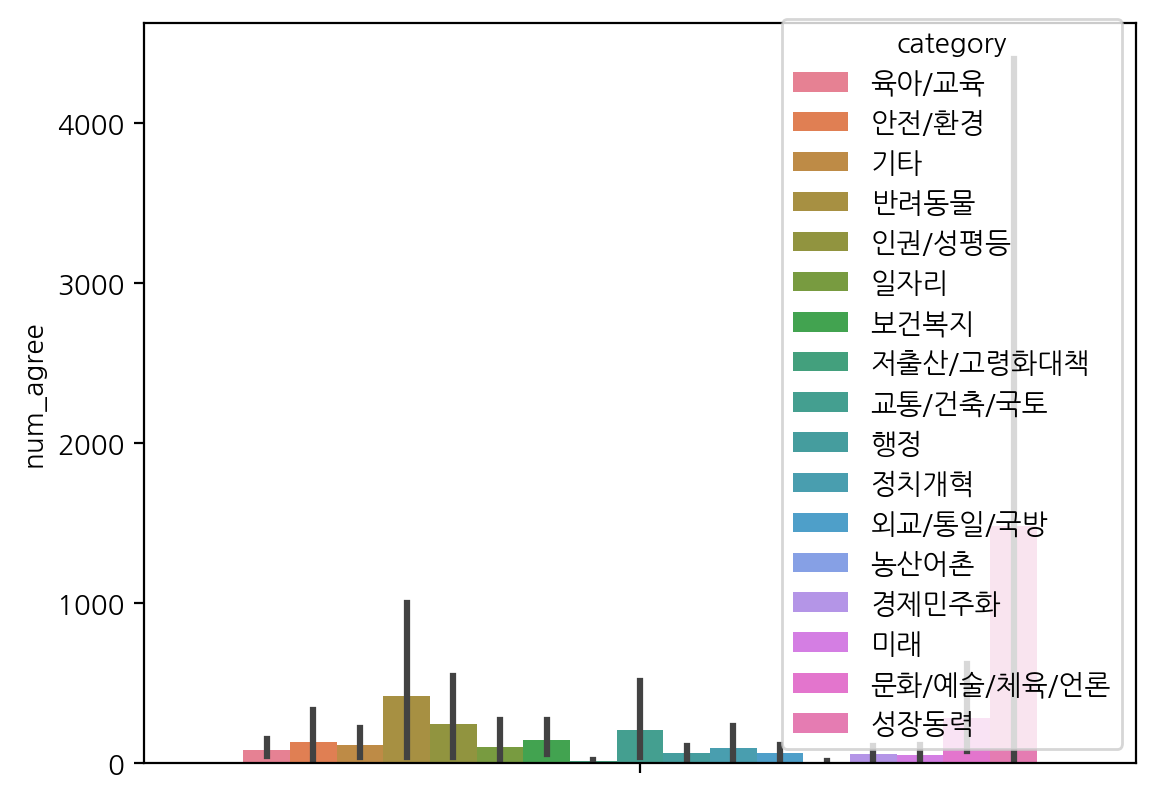

In [ ]:
import seaborn as sns

sns.barplot(data=all_df_2017,y='num_agree',hue='category')

#### 2018년 청원 데이터 불러오기 **토픽 모델링**을 위한 데이터

In [ ]:
import pandas as pd

file_path_18_1 ='/content/drive/MyDrive/download/petitions_2018-01.txt'
file_path_18_2 ='/content/drive/MyDrive/download/petitions_2018-02.txt'
file_path_18_3 ='/content/drive/MyDrive/download/petitions_2018-03.txt'
file_path_18_4 ='/content/drive/MyDrive/download/petitions_2018-04.txt'
file_path_18_5 ='/content/drive/MyDrive/download/petitions_2018-05.txt'
file_path_18_6 ='/content/drive/MyDrive/download/petitions_2018-06.txt'
file_path_18_7 ='/content/drive/MyDrive/download/petitions_2018-07.txt'
file_path_18_8 ='/content/drive/MyDrive/download/petitions_2018-08.txt'
file_path_18_9 ='/content/drive/MyDrive/download/petitions_2018-09.txt'
file_path_18_10 ='/content/drive/MyDrive/download/petitions_2018-10.txt'
file_path_18_11='/content/drive/MyDrive/download/petitions_2018-11.txt'
file_path_18_12='/content/drive/MyDrive/download/petitions_2018-12.txt'


df_18_1 = pd.DataFrame()
df_18_2 = pd.DataFrame()
df_18_3 = pd.DataFrame()
df_18_4 = pd.DataFrame()
df_18_5 = pd.DataFrame()
df_18_6 = pd.DataFrame()
df_18_7 = pd.DataFrame()
df_18_8 = pd.DataFrame()
df_18_9 = pd.DataFrame()
df_18_10 = pd.DataFrame()
df_18_11 = pd.DataFrame()
df_18_12 = pd.DataFrame()


file_list = [file_path_18_1,file_path_18_2,file_path_18_3,file_path_18_4,file_path_18_5,file_path_18_6,file_path_18_7,file_path_18_8,file_path_18_9,file_path_18_10,file_path_18_11,file_path_18_12,]
df_list = [df_18_1,df_18_2,df_18_3,df_18_4,df_18_5,df_18_6,df_18_7,df_18_8,df_18_9,df_18_10,df_18_11,df_18_12]



index = 0

for file in file_list:
    with open(file, 'r', encoding='utf-8', errors='ignore') as f:
         content = f.read()

    content = content.strip().split('\n')

    data_list = []
    for line in content:
        try:
            # 각 줄을 JSON 객체로 변환하고 리스트에 추가
            parsed_data = json.loads(line)
            data_list.append(parsed_data)
        except json.JSONDecodeError:
            # 오류가 발생한 경우, 해당 줄을 무시
            continue
    df_list[index] = pd.DataFrame(data_list)
    index += 1
    data_list = []


df_18_1,df_18_2,df_18_3,df_18_4,df_18_5,df_18_6,df_18_7,df_18_8,df_18_9,df_18_10,df_18_11,df_18_12 = df_list   # 데이터 로드가 끝난 데이터를 언패킹

In [ ]:
all_df_2018 = pd.concat([df_18_1,df_18_2,df_18_3,df_18_4,df_18_5,df_18_6,df_18_7,df_18_8,df_18_9,df_18_10,df_18_11,df_18_12])

In [ ]:
all_df_2018 # 2018년 전체 데이터
all_df_2018.to_csv('all_df.2018',index=False)

#### 2017년 08월~12월 데이터, 2018년 청원 데이터 데이터 탐색 및 시각화

In [ ]:
all_df_2018

,category,begin,end,content,num_agree,petition_idx,status,title,replies
0,행정,2018-01-01,2018-01-31,"이런 국민청원하는 게시판에서 뭐 섹스,희주야'''''이런 이상한 글 올라오는데 여기...",6,77785,청원종료,아...이런데서 이상한 글이 올라오네요...,NaN
1,기타,2018-01-01,2018-01-31,"""배틀 그라운드""는 현재 세계적으로나 우리나라 에서나 매우 흥행 하는 게임입니다. ...",1,77786,청원종료,"현재 사람들 사이에서 유행하는 게임 ""배틀 그라운드"" 에 대한 제재를 가하려 합니다.",NaN
2,정치개혁,2018-01-01,2018-01-31,적폐청산의 시금석 양심수들의 특별사면 배제 문재인 정부를 규탄한다. 지난 12월 2...,0,77787,청원종료,양심수 석방 국가보안법 철폐,NaN
3,인권/성평등,2018-01-01,2018-01-31,"안녕하세요. 살벌한 독재시대를 떠나, 대한민국 민주화를 이룩하신 수많은 열사들이, ...",3,77788,청원종료,민주화유공자들에 대한 국가유공자 인정 요청,NaN
4,외교/통일/국방,2018-01-01,2018-01-31,Uae 괸련한 야당 질의와 관련하여 기본적으로 유시민 작가의 말씀에 동의하여 국익에...,0,77789,청원종료,UAE 관련,NaN
...,...,...,...,...,...,...,...,...,...
19994,정치개혁,2018-12-31,2019-01-30,공개할거면 내용 그대로 공개 하고 '의역 = 허위 과장' 하지 마세요... 지난 번...,6,483900,청원종료,김정은 친서 의역 금지 및 공개 청원...,NaN
19995,문화/예술/체육/언론,2018-12-31,2019-01-30,엑소 해체해주세요 빨리요,21,483902,청원종료,엑소 해체,NaN
19996,정치개혁,2018-12-31,2019-01-30,박근혜를 사면하라,5,483903,청원종료,박근혜를 사면하라,NaN
19997,외교/통일/국방,2018-12-31,2019-01-30,국방의 의무를 피하기위해 의도적으로 체중감량을한 지인의 재검을 희망합니다. 의도적으...,2,483904,청원종료,국방의 의무를 피하기위해 의도적으로 체중감량을한 지인의 재검을 희망합니다,NaN


In [ ]:
all_df_2018.info()

In [ ]:
all_df_2018[all_df_2018['num_agree'] >= 200]

,category,begin,end,content,num_agree,petition_idx,status,title,replies
48,기타,2018-01-01,2018-01-31,당시 김샘 학생이 시위하던 곳은 금지된 구역이 아니었으며 때문에 공동주거침입 혐의로...,1852,77840,청원종료,위안부 합의 무효를 위해 힘든 재판을 견디고 있을 김샘학생의 무죄선고를 청원합니다,NaN
324,문화/예술/체육/언론,2018-01-01,2018-01-31,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니...,1603,78203,청원종료,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니다.,NaN
338,일자리,2018-01-01,2018-01-31,안녕하세요. 정권이 바뀌고부터 대통령님과 정부에서 추진하시는 비정규직의 정규직화정책...,724,78221,청원종료,비정규직의 정규직화에 대한 기준을 다시 재고하여주십시오. 무분별한 정규직화에 반대...,NaN
358,인권/성평등,2018-01-02,2018-02-01,동성결혼을 인정해 주십시오. 어른들은 모든 아이들에게 가르칩니다. 틀린 것과 다른 ...,8032,78244,청원종료,동성결혼을 합법화 해주세요.,NaN
390,육아/교육,2018-01-02,2018-02-01,안녕하십니까.. 저는 현재 보육교사로 근무하고 있는 박민정 입니다. 늦은 나이에 아...,6389,78281,청원종료,보육교사 권리보장,NaN
...,...,...,...,...,...,...,...,...,...
19713,보건복지,2018-12-31,2019-01-30,제가 요청하는건 두가지입니다 1. 만40세에 받는 유방암 검진나이를 낮춰주세요 2....,528,483517,청원종료,유방암 국가검진 더 일찍 받을수 있게 해주세요,NaN
19751,교통/건축/국토,2018-12-31,2019-01-30,의정부 민락신도시는 인구 10만 이상이 거주하는 거대 도시로 계획되어 개발되고 있습...,1276,483568,청원종료,민락2지구 7호선 정거장 설치에 관한 청원,NaN
19898,인권/성평등,2018-12-31,2019-01-30,2018년 12월 29일 오전 10시 즈음 수원시 권선구 소재 초등학교 인근에서 발...,2241,483769,청원종료,"20대 정신 이상자, 85세 할머니를 뇌사에 빠트리다",NaN
19924,보건복지,2018-12-31,2019-01-30,"2019년 새해로 넘어가는 마지막 날, 강북 삼성병원에서 근무하시던 정신과 교수님께...",69153,483805,청원종료,강북 삼성병원 의료진 사망사건에 관련한 의료 안정성을 위한 청원,NaN


In [ ]:
all_df_2018['category'].unique()

array(['행정', '기타', '정치개혁', '인권/성평등', '외교/통일/국방', '교통/건축/국토', '보건복지',
       '일자리', '미래', '농산어촌', '육아/교육', '경제민주화', '성장동력', '문화/예술/체육/언론',
       '반려동물', '안전/환경', '저출산/고령화대책'], dtype=object)

#### 토픽 모델링
* https://happy-obok.tistory.com/5
* 토픽 모델링(Topic Modeling)이란 기계 학습 및 자연어 처리 분야에서 토픽이라는 문서 집합의 추상적인 주제를 발견하기 위한 통계적 모델 중 하나로, 텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법입니다.
* 청원 데이터에서 각 카테고리별로 숨겨진 토픽들을 찾아내기 위한 방법

In [ ]:
df_copy = all_df_2017[all_df_2017['num_agree'] >= 10].copy() # 2017년 데이터 중 동의수가 10이상인 데이터

In [ ]:
df_copy

In [ ]:
df_hyg = df_copy[df_copy['category'] == '보건복지'] # 카테고리가 보건/복지인 데이터를 선별

In [ ]:
df_hyg

#### 토픽 모델링 방법론: ** 잠재 디리클레 **

* 토픽 모델링은 문서 집합에서 토픽을 발견하기 위해 사용되는 통계적 모델링 방법이며, 이 방법은 <u>문서들이 하나 이상의 토픽으로 구성</u>되어 있으며, <u>각 토픽은 특정 단어들의 분포로 표현</u>될 수 있다는 가정 하에 작동함.
    * <u>잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)은 토픽 모델링에서 가장 널리 사용되는 알고리즘</u> 중 하나임.

#### *토픽 모델링링 과정*
* **전처리**: 문서 집합에 대해 텍스트 정제(불용어 제거, 어간 추출 등), 토큰화 등의 전처리 작업을 수행함.
* **모델 선택 및 설정**: LDA와 같은 토픽 모델을 선택하고, 모델의 파라미터(예: 토픽의 수)를 설정함.
* **모델 학습**: 전처리된 데이터에 대해 토픽 모델을 학습시키며, 이 과정에서 각 문서에 대한 토픽 분포와 각 토픽에 대한 단어 분포가 추정됨.
* **결과 해석 및 평가**: 학습된 모델을 기반으로 추출된 토픽과 그 구성 요소인 단어들을 해석하고 모델의 성능을 평가함.

#### 잠재 디리클레 할당으로 토픽 분류하기
* 1. 라이브러리 설치 및 데이터 불러오기
* 2. 한번 예시를 들어보기 위해 보건복지부 데이터만을 위해 추출함

In [ ]:
df_hyg['doc'] = df_hyg['title'] + ' ' + df_hyg['content'] # 제목과 내용을 합쳐 문서를 만든다

#### konply를 이용한 한글 텍스트 전처리 -> 명사만 추출

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash # konply 사용을 위한 라이브러리 설치

In [ ]:
# 형태소 분석기에서 Okt 불러오기
from konlpy.tag import Okt
okt = Okt()

# 조사,어미,구두점 제거, 어간 추출
def okt_clean(text):
    '''
    텍스트가 들어오면 텍스트에 있는 단어들에게 명사,조사 등의
    이름을 지정하여, 해당 조사,어미,구두점을 제거하는 함수

    text : str

    return : str
    '''

    clean_txt = []
    for word in okt.pos(text,stem=True):
        if word[1] not in ['Josa','Eomi','Punctuation']:
            clean_txt.append(word[0])

    return ' '.join(clean_txt)

from tqdm import tqdm
tqdm.pandas


df_hyg['doc'] = df_hyg['doc'].apply(okt_clean)

In [ ]:
df_hyg # 보건복지만 뽑아낸 데이터

#### 잠재 디리클레 할당으로 토픽 분류하기
*  2. 단어 벡터화하기

* **scikit-learn의 CountVectorizer**: <u>전통적인 머신러닝 모델에 적합한 텍스트를 벡터로 변환</u>하는 기능에 초점을 맞추고 있음.
* 분석 프로젝트(예: 모델의 종류, 전처리 과정에서 필요한 기능 등)에 따라 가장 적합한 도구를 선택하 는것이 중요함. → <u>머신러닝 모델은 scikit-learn 계열 라이브러리 사용 권장!</u>
* 단어들을 모델에 학습시키기 위해선 벡터화를 진행해야 한다

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer에 예전 메소드 이름을 추가하여 호환성 유지 -> 현재의 버전과 호환
CountVectorizer.get_feature_names = CountVectorizer.get_feature_names_out

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() # 단어들의 출현 빈도로 여러 문서를 벡터화하기 위해 cv를 불러온다

In [ ]:
doc_cv = cv.fit_transform(df_hyg['doc']) # cv 모델에 'doc'프레임을 학습

In [ ]:
cv_cols = cv.get_feature_names_out()

In [ ]:
pd.DataFrame(doc_cv.toarray(),columns=cv_cols).sum().sort_values()

#### 잠재 디리클레 할당으로 토픽 분류하기
* 3. 잠재 디리클레 할당 적용하기

#### 잠재 디리클레 할당으로 토픽 분류하기
* 4. pyLDvis를 통한 시각화하기

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

NUM_TOPICS = 5
LDA_model = LatentDirichletAllocation(n_components=NUM_TOPICS,random_state=42)

LDA_model.fit(doc_cv)
print(LDA_model)

In [ ]:
!pip install scikit-learn==1.0.0  # Adjust version as needed
!pip install pyLDAvis==3.4.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.0 MB/s eta 0:00:00


In [ ]:
import pyLDAvis

pyLDAvis.enable_notebook()
prepared_data = pyLDAvis.prepare(
    topic_term_dists=LDA_model.components_ / LDA_model.components_.sum(axis=1)[:, np.newaxis],  # 주제-단어 분포
    doc_topic_dists=LDA_model.transform(doc_cv),  # 문서-주제 분포
    doc_lengths=doc_cv.sum(axis=1).A1,  # 각 문서의 총 단어 수
    vocab=cv.get_feature_names_out(),  # 어휘 목록
    term_frequency=np.asarray(doc_cv.sum(axis=0)).ravel(),  # 전체 데이터셋에서 각 단어의 빈도
    mds='tsne'  # 차원 축소 기법 선택
)
pyLDAvis.display(prepared_data)


#### 2017년 8월부터 12월 청원데이터 중 동의수가 10 이상인 데이터에 대해 잠재 디리클레 기법 적용


In [ ]:
df_copy['category'].nunique() # 17

In [ ]:
df_copy.groupby('category')['title'].count() # df_copy -> 동의수가 10 이상인 2017년 4개월 간 데이터

In [ ]:
df_copy['doc'] = df_copy['title'] + ' ' + df_copy['content'] # 제목과 내용을 합쳐, 문서를 만든다

#### 한글 전처리
* 조사,어미,구두점 제거 -> 어간 추출

In [ ]:
# 형태소 분석기에서 Okt 불러오기
from konlpy.tag import Okt
okt = Okt()

# 조사,어미,구두점 제거, 어간 추출
def okt_clean(text):
    clean_txt = []
    for word in okt.pos(text,stem=True):
        if word[1] not in ['Josa','Eomi','Punctuation']:
            clean_txt.append(word[0])

    return ' '.join(clean_txt)

from tqdm import tqdm
tqdm.pandas


df_copy['doc'] = df_copy['doc'].apply(okt_clean)

#### 한글 전처리
* 불용어 처리: 한글에 존재하는 '되다', '아니다'와 같은 불용어를 제거

In [ ]:
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['합니다','하다','있다','이다','되다','하지만','그리고','그런데','저는','제가','정말','너무','합니다','않다','없다','되어다','받다','아니다']
    meaningful_words = [word for word in tokens if not word in stops]
    return ' '.join(meaningful_words)

df_copy['doc'] = df_copy['doc'].apply(remove_stopwords)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() # 단어들의 출현 빈도로 여러 문서를 벡터화하기 위해 cv를 불러온다
doc_cv = cv.fit_transform(df_copy['doc'])
cv_cols = cv.get_feature_names_out()
pd.DataFrame(doc_cv.toarray(),columns=cv_cols).sum().sort_values()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation # 잠재 디리클레 기법 적용

NUM_TOPICS = 15 # 카테고리는 15개로 설정
LDA_model = LatentDirichletAllocation(n_components=NUM_TOPICS,random_state=42)

LDA_model.fit(doc_cv)

In [ ]:
import pyLDAvis

pyLDAvis.enable_notebook()
prepared_data = pyLDAvis.prepare(
    topic_term_dists=LDA_model.components_ / LDA_model.components_.sum(axis=1)[:, np.newaxis],  # 주제-단어 분포
    doc_topic_dists=LDA_model.transform(doc_cv),  # 문서-주제 분포
    doc_lengths=doc_cv.sum(axis=1).A1,  # 각 문서의 총 단어 수
    vocab=cv.get_feature_names_out(),  # 어휘 목록
    term_frequency=np.asarray(doc_cv.sum(axis=0)).ravel(),  # 전체 데이터셋에서 각 단어의 빈도
    mds='tsne'  # 차원 축소 기법 선택
)
pyLDAvis.display(prepared_data)


#### **2018년 청원 데이터**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_copy_18 = all_df_2018[all_df_2018['num_agree']>200] # 동의수가 500 이상인, 청원이 어느정도 진행된 데이터만을 사용

In [ ]:
df_copy_18['doc'] = df_copy_18['title'] + ' ' + df_copy_18['content'] # 제목과 내용을 합쳐, 문서를 만든다

<ipython-input-23-f835e2e71350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_18['doc'] = df_copy_18['title'] + ' ' + df_copy_18['content'] # 제목과 내용을 합쳐, 문서를 만든다


In [ ]:
df_copy_18

,category,begin,end,content,num_agree,petition_idx,status,title,replies,doc
17,교통/건축/국토,2018-01-01,2018-01-31,10년공공임대분양가를 5년공공임대 분양전환 산정방식과 동일하게 변경해 주세요. 5년...,450,77802,청원종료,10년공공임대분양가를 5년공공임대 분양전환 산정방식과 동일하게 변경해 주세요.,NaN,10년공공임대분양가를 5년공공임대 분양전환 산정방식과 동일하게 변경해 주세요. 10...
48,기타,2018-01-01,2018-01-31,당시 김샘 학생이 시위하던 곳은 금지된 구역이 아니었으며 때문에 공동주거침입 혐의로...,1852,77840,청원종료,위안부 합의 무효를 위해 힘든 재판을 견디고 있을 김샘학생의 무죄선고를 청원합니다,NaN,위안부 합의 무효를 위해 힘든 재판을 견디고 있을 김샘학생의 무죄선고를 청원합니다 ...
281,정치개혁,2018-01-01,2018-01-31,■임기만료일의 논쟁■ ■명확한 근거와 예시■ 문재인의 임기는 2018년 2월까지다....,316,78158,청원종료,문재인대통령대행은 2018년2월까지이다,NaN,문재인대통령대행은 2018년2월까지이다 ■임기만료일의 논쟁■ ■명확한 근거와 예시■...
324,문화/예술/체육/언론,2018-01-01,2018-01-31,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니...,1603,78203,청원종료,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니다.,NaN,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니...
338,일자리,2018-01-01,2018-01-31,안녕하세요. 정권이 바뀌고부터 대통령님과 정부에서 추진하시는 비정규직의 정규직화정책...,724,78221,청원종료,비정규직의 정규직화에 대한 기준을 다시 재고하여주십시오. 무분별한 정규직화에 반대...,NaN,비정규직의 정규직화에 대한 기준을 다시 재고하여주십시오. 무분별한 정규직화에 반대...
...,...,...,...,...,...,...,...,...,...,...
19898,인권/성평등,2018-12-31,2019-01-30,2018년 12월 29일 오전 10시 즈음 수원시 권선구 소재 초등학교 인근에서 발...,2241,483769,청원종료,"20대 정신 이상자, 85세 할머니를 뇌사에 빠트리다",NaN,"20대 정신 이상자, 85세 할머니를 뇌사에 빠트리다 2018년 12월 29일 오전..."
19913,미래,2018-12-31,2019-01-30,오늘 강북삼성병원 정신과에서 자신이 치료하던 의사가 환자흉기에 찔려 사망했습니다 새...,205,483787,청원종료,강북삼성병원정신과의사피습사건 가해자 강력하게 처벌해주세요,NaN,강북삼성병원정신과의사피습사건 가해자 강력하게 처벌해주세요 오늘 강북삼성병원 정신과에...
19924,보건복지,2018-12-31,2019-01-30,"2019년 새해로 넘어가는 마지막 날, 강북 삼성병원에서 근무하시던 정신과 교수님께...",69153,483805,청원종료,강북 삼성병원 의료진 사망사건에 관련한 의료 안정성을 위한 청원,NaN,강북 삼성병원 의료진 사망사건에 관련한 의료 안정성을 위한 청원 2019년 새해로 ...
19925,교통/건축/국토,2018-12-31,2019-01-30,저는 지금 카니발을 소유한지 7년입니다. 차량검사시 아무문제없던 사이드스텝이 언제부...,939,483807,청원종료,자동차 사이드스텝 규정 완화,NaN,자동차 사이드스텝 규정 완화 저는 지금 카니발을 소유한지 7년입니다. 차량검사시 아...


#### 한글 전처리
* 어미,조사,구두점 제거 -> 어간 추출
* 이 과정이 상당히 오래걸림
* 다음엔 병렬적 처리 방식으로 함수를 설정해보고 싶음

In [ ]:
# 형태소 분석기에서 Okt 불러오기
from konlpy.tag import Okt
okt = Okt()

# 조사,어미,구두점 제거, 어간 추출
def okt_clean(text):
    '''
    텍스트가 들어오면 텍스트에 있는 단어들에게 명사,조사 등의
    이름을 지정하여, 해당 조사,어미,구두점을 제거하는 함수

    text : str

    return : str
    '''
    clean_txt = []
    for word in okt.pos(text,stem=True):
        if word[1] not in ['Josa','Eomi','Punctuation']:
            clean_txt.append(word[0])

    return ' '.join(clean_txt)

from tqdm import tqdm
tqdm.pandas


df_copy_18['doc'] = df_copy_18['doc'].apply(okt_clean)

#### 불용어 처리
*   불용어 처리는 토픽 모델링을 반복해서 돌려가면서, 의미가 있는 단어와 그렇지 않는 단어를 구별하는 작업을 반복

In [ ]:
def remove_stopwords(text):
    '''
    텍스트를 공백을 구분하고, 설정한 불용어를 제거하는 함수

    text : str

    return : str
    '''
    tokens = text.split(' ')
    stops = ['합니다','하다','있다','이다','되다','하지만','그리고','그런데','저는','제가','정말','너무','합니다','않다','없다','되어다','받다','아니다']
    meaningful_words = [word for word in tokens if not word in stops]
    return ' '.join(meaningful_words)

df_copy_18['doc'] = df_copy_18['doc'].apply(remove_stopwords)

#### LDA 모델에 학습시키기 위해, 텍스트들을 벡터화
*   텍스트 데이터를 숫자형 데이터로 변환하는 과정
*   '나는 병원을 갔습니다' -> 0 2 0 1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() # 단어들의 출현 빈도로 여러 문서를 벡터화하기 위해 cv를 불러온다
doc_cv = cv.fit_transform(df_copy_18['doc'])
cv_cols = cv.get_feature_names_out()
pd.DataFrame(doc_cv.toarray(),columns=cv_cols).sum().sort_values()

정략          1
주크          1
포퍼          1
주태          1
서울구치소       1
         ... 
생각       3971
사람       4352
아이       4618
보다       4677
국민       5434
Length: 36951, dtype: int64

#### 잠재 디리클레 기법 적용

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation # 잠재 디리클레 기법 적용

NUM_TOPICS = 15 # 카테고리는 15개로 설정
LDA_model = LatentDirichletAllocation(n_components=NUM_TOPICS,random_state=42)

LDA_model.fit(doc_cv)

LatentDirichletAllocation(n_components=15, random_state=42)

#### 잠재 디리클레 기법이 적용된 topic들을 시각화: 15개의 주제들을 지정




In [ ]:
!pip install scikit-learn==1.0.0  # Adjust version as needed
!pip install pyLDAvis==3.4.1      # 코랩 내에 pyLDAvis 와 사이킷런 버전 호환 문제 해결


In [ ]:
import pyLDAvis

pyLDAvis.enable_notebook()
prepared_data = pyLDAvis.prepare(
    topic_term_dists=LDA_model.components_ / LDA_model.components_.sum(axis=1)[:, np.newaxis],  # 주제-단어 분포
    doc_topic_dists=LDA_model.transform(doc_cv),  # 문서-주제 분포
    doc_lengths=doc_cv.sum(axis=1).A1,  # 각 문서의 총 단어 수
    vocab=cv.get_feature_names_out(),  # 어휘 목록
    term_frequency=np.asarray(doc_cv.sum(axis=0)).ravel(),  # 전체 데이터셋에서 각 단어의 빈도
    mds='tsne'  # 차원 축소 기법 선택
)
pyLDAvis.display(prepared_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


이 시각화는 특정 주제(Topic 15)에 대한 상위 30개의 관련 용어를 보여줍니다. 다음은 그래프에 대한 상세한 설명입니다.

주요 구성 요소:
제목:

"Top-30 Most Relevant Terms for Topic 15 (2.4% of tokens)"는 이 차트가 Topic 15와 관련된 상위 30개 용어를 보여주며, 이 주제가 전체 데이터셋에서 2.4%를 차지한다는 것을 의미합니다.
관련성 메트릭 슬라이더 (λ):

상단의 슬라이더는 λ 값을 조정하여 관련성 메트릭을 설정합니다. 이 값은 0에서 1까지 조정 가능합니다. 현재 λ 값은 1로 설정되어 있습니다. 관련성 메트릭은 주제 내 용어 빈도와 전체 코퍼스에서의 용어 빈도의 균형을 결정합니다.
λ = 1일 때, 관련성은 주제 내 용어의 빈도에만 기반합니다.

λ = 0일 때, 해당 용어가 전체 코퍼스에서 나타나는 빈도 대비 특정 주제에서 얼마나 자주 나타나는지를 의미합니다. 쉽게 말해, 특정 주제에 대해 얼마나 독특한 용어인지를 보여줍니다.

빨간색 막대: 선택된 주제(Topic 15) 내에서의 예상 용어 빈도를 나타냅니다.
파란색 막대: 전체 코퍼스에서의 전체 용어 빈도를 나타냅니다.
용어는 y축에 나열되어 있으며, 해당 용어의 빈도는 x축에 표시됩니다.
용어와 빈도의 설명:
난민, 불법, 한국, 택배, 제주도 등과 같은 용어들이 나열되어 있습니다. 각 용어의 빨간색 막대는 Topic 15에서 얼마나 자주 나타나는지를 나타내고, 파란색 막대는 데이터셋 전체에서의 빈도를 나타냅니다.

예시 분석:

아이: 이 용어는 파란색 막대가 크고, 빨간색 막대도 상당히 크기 때문에 전체 코퍼스에서 높은 빈도를 가지고 있으며 Topic 15에서도 높은 관련성을 가집니다.
예멘: 이 용어는 파란색 막대가 작고 빨간색 막대가 크기 때문에, 전체 코퍼스에서는 자주 나타나지 않지만 Topic 15에서는 특히 관련성이 높습니다.
공식:

이 공식은 주제 내 용어의 확률과 그 용어의 독특성 간의 균형을 맞춥니다.
해석:
빨간색 막대가 파란색 막대에 비해 높은 용어는 Topic 15에 더 특화된 용어입니다.
파란색 막대가 큰 용어는 전체 코퍼스에서 일반적으로 많이 나타나는 용어지만, 빨간색 막대도 크다면 Topic 15에서도 중요한 용어입니다.
이 시각화는 주어진 코퍼스에서 Topic 15를 정의하는 주요 테마와 특정 용어를 이해하는 데 도움을 줍니다.







#### λ의 의미
*   λ = 1 일수록 토픽 별로 가장 자주 등장하는 단어들을 우선적으로 키워드로 선택한다는 의미 이고
*   λ = 0 일수록 토픽 간에 차이가 많이 나는 단어를 선택한다는 의미(해당 토픽에서 많이 등장한 단어)

In [ ]:
# Topic 11의 상위 빈도수 주제어들을 추출
prepared_data.topic_info[prepared_data.topic_info['Category'] == 'Topic11']

*   Term (용어): 주제와 관련된 단어 또는 구문.
*   Freq (빈도): 해당 주제 내에서 용어가 나타난 빈도.
*   Total (전체 빈도): 모든 주제에서 해당 용어가 나타난 빈도.
*   Category (카테고리): 용어가 속한 주제.
*   logprob (로그 확률): 해당 주어가 주제 내에서 나타날 확률의 로그값.
*   loglift (로그 리프트): 용어가 주제 내에서 평균적으로 나타나는 빈도보다 얼마나 더 자주 나타나는지를 측정하는 리프트 점수의 로그값.

In [ ]:
topic_list = prepared_data.topic_info['Category'].value_counts(ascending=False).index.tolist() # 토픽의 수를 정렬하고, 리스트로 변환

In [ ]:
for i in topic_list:
    print(prepared_data.topic_info[prepared_data.topic_info['Category']==i])

In [ ]:
prepared_data.topic_info[prepared_data.topic_info['Category'] == 'Topic15']

In [ ]:
#### 토픽별로 상위 10개 단어 추출하기
dic = {}
term_list = []
sum = 0
topic_list = ['Topic1','Topic2','Topic3','Topic4','Topic5','Topic6','Topic7','Topic8','Topic9','Topic10','Topic11','Topic12','Topic13','Topic14','Topic15']
for top in topic_list:
    for i in prepared_data.topic_info[prepared_data.topic_info['Category'] == top]['Term']:
        term_list.append(i)
        sum += 1
        if sum == 10:
           break
    dic[top] = term_list
    sum = 0
    term_list = []

topic_df = pd.DataFrame(dic)

In [ ]:
lam0_topic_df = topic_df.copy() # 람다 파라미터: 0일 경우
lam0_topic_df

In [ ]:
lam1_topic_df = pd.DataFrame()

#### 주제별로 무엇을 뽑아낼 수 있을까?


*   인권/성평등
*   육아/교육
*   안전/환경
*   교통/건축/국토
*   정치개혁
*   보건 복지
*   기타
*   문화/예술/체육/언론
*   외교/통일/국방
*   행정
*   일자리
*   경제민주화
*   반려동물
*   미래
*   성장동력
*   농산어촌
*   저출산/고령화대책


In [ ]:
topic_map = {
    'Topic1': '보건 복지',
    'Topic2': '안전/환경',
    'Topic3': '외교/통일/국방',
    'Topic4': '육아/교육',
    'Topic5': '교통/건축/국토',
    'Topic6': '인권/성평등',
    'Topic7': '저출산/고령화대책',
    'Topic8': '일자리',
    'Topic9': '교통/건축/국토',
    'Topic10': '문화/예술/체육/언론',
    'Topic11': '문화/예술/체육/언론',
    'Topic12': '경제민주화',
    'Topic13': '농산어촌',
    'Topic14': '인권/성평등',
    'Topic15': '외교/통일/국방'
 }

In [ ]:
topic_df_copy = topic_df.copy()
topic_df_copy = topic_df_copy.rename(columns=topic_map)
topic_df_copy

#### 주제별로 무엇을 뽑아낼 수 있을까?


*   인권/성평등: 무고죄, 페미니즘
*   육아/교육: 교권,유은혜
*   안전/환경: 소각발전소, 성민이 사건, 동물학대(길고양이),
*   교통/건축/국토:
*   정치개혁
*   보건 복지
*   기타
*   문화/예술/체육/언론
*   외교/통일/국방
*   행정
*   일자리
*   경제민주화
*   반려동물
*   미래
*   성장동력
*   농산어촌
*   저출산/고령화대책


In [ ]:
df_copy_18['category'].value_counts()

#### 해석
 * 2018년 <u>청원 데이터들에 대한 토픽모델링(잠재 디리클레 기법)을 적용한 결과, 해당 데이터 프레임과 같은 상위 단어들이 각각의 Topic 별로 구분됨</u>
 * 예를 들어, Topic11의 경우 선수, 빙상,출전, 컬링등을 통해 **'문화/예술/체육/언론'**에 해당하는 토픽이라는 것을 알 수 있음. 이때 <u>그 당시에 문제가 된 컬링 국가대표내에 있었던, 특정 선수간의 갑질, 욕설 문제등이 청원에서 두드러지게 나타났음</u>을 알 수 있다.

In [ ]:
user_input = input('키워드를 입력하시오')

for title in df_copy_18['title']:
    if user_input in title:
        print(title)

In [ ]:
df_copy_18[df_copy_18['title'] == '음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요']

In [ ]:
df_200000 = df_copy_18[df_copy_18['num_agree'] >= 200000].groupby('category')['title'].value_counts()

In [ ]:
print(df_200000)
df_200000.to_csv('df_200000')

#### category별로 키워드 추출하기
